# Alpha Vantage API - Technical Indicators
______________________

## Collecting information for a stock/ETF technical analysis using Alpha Vantage API

In [30]:
# Import libraries
import os
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [31]:
# Read in the API Key (obtained at https://www.alphavantage.co/documentation/) 
apikey = os.getenv('ALPHA_VANTAGE_KEY')
ticker = 'GTBP'

# Company Overview

In [32]:
# Company overview
company_overview = f"https://www.alphavantage.co/query?function=OVERVIEW&symbol={ticker}&apikey={apikey}"
response_data = requests.get(company_overview).json()
response_data

{'Symbol': 'GTBP',
 'AssetType': 'Common Stock',
 'Name': 'GT Biopharma, Inc',
 'Description': 'GT Biopharma, Inc., a clinical-stage biopharmaceutical company, focuses on the development and commercialization of immuno-oncology products based on its patented immune-enhancer cell fusion protein Tri-specific Killer Engager (TriKE) technology platform. The company is headquartered in Beverly Hills, California.',
 'CIK': '109657',
 'Exchange': 'NASDAQ',
 'Currency': 'USD',
 'Country': 'USA',
 'Sector': 'LIFE SCIENCES',
 'Industry': 'PHARMACEUTICAL PREPARATIONS',
 'Address': '1825 K STREET, SUITE 510, WASHINGTON, D.C., DC, US',
 'FiscalYearEnd': 'December',
 'LatestQuarter': '2021-03-31',
 'MarketCapitalization': '321141000',
 'EBITDA': '-15557000',
 'PERatio': 'None',
 'PEGRatio': 'None',
 'BookValue': '1.179',
 'DividendPerShare': 'None',
 'DividendYield': '0',
 'EPS': '-4.855',
 'RevenuePerShareTTM': '0',
 'ProfitMargin': '0',
 'OperatingMarginTTM': '0',
 'ReturnOnAssetsTTM': '-1.552',
 

In [33]:
# Collect daily close price history
daily_prices = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={ticker}&outputsize=full&apikey={apikey}"
response_data = requests.get(daily_prices).json()
response_data.keys()

dict_keys(['Meta Data', 'Time Series (Daily)'])

In [34]:
daily_prices = response_data['Time Series (Daily)']
# Create dataframe from json type response
daily_prices_df = pd.DataFrame(daily_prices)
# Transform dataframe 
daily_prices_df = daily_prices_df.T
# Convert data from object type to float type 
daily_prices_df = daily_prices_df.astype('float').iloc[:252]
daily_prices_df = daily_prices_df["4. close"]
daily_prices_df

2021-07-02    15.200
2021-07-01    15.260
2021-06-30    15.500
2021-06-29    15.830
2021-06-28    16.230
               ...  
2020-07-10     0.130
2020-07-09     0.126
2020-07-08     0.138
2020-07-07     0.145
2020-07-06     0.140
Name: 4. close, Length: 252, dtype: float64

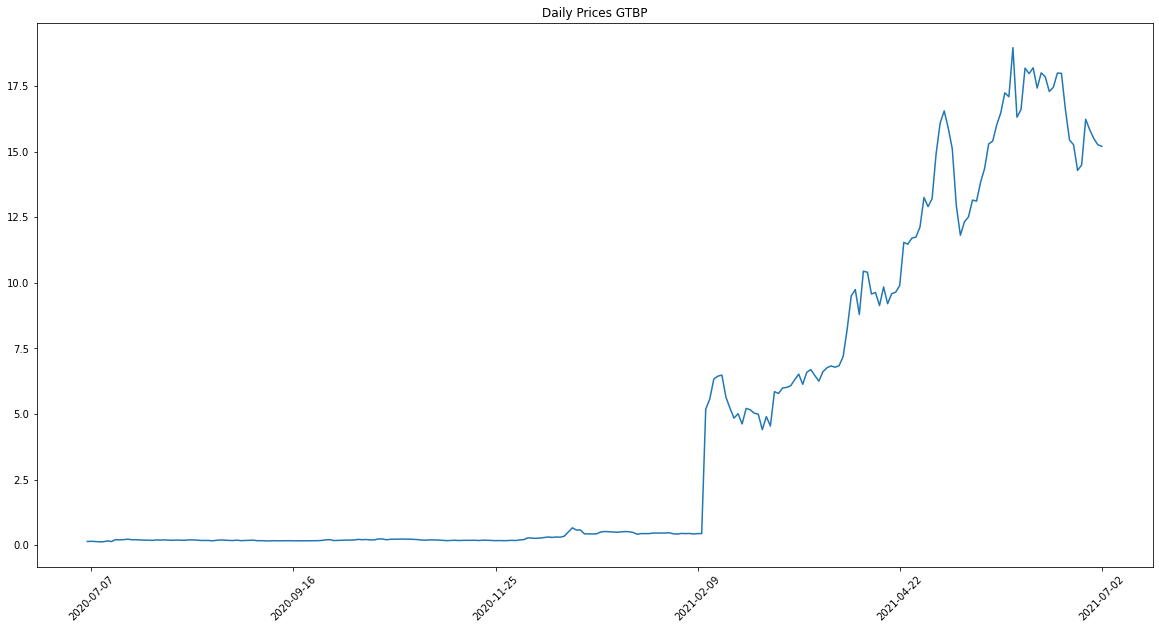

In [35]:
# Plot daily prices
daily_prices_plot = daily_prices_df.plot(figsize=(20,10), title=f"Daily Prices {ticker}", rot=45)
daily_prices_plot.invert_xaxis()

# EMA - Exponential Moving Average

In [36]:
# Customize url to obtain EMA (exponential moving average) data
interval = 'daily'
time_period = '30'

ema = f"https://www.alphavantage.co/query?function=EMA&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(ema).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: EMA'])

In [37]:
ema = response_data['Technical Analysis: EMA']
# Create dataframe from json type response
ema_df = pd.DataFrame(ema)
# Transform dataframe 
ema_df = ema_df.T
# Convert data from object type to float type 
ema_df = ema_df.astype('float').iloc[:252]
ema_df

,EMA
2021-07-02,15.6937
2021-07-01,15.7277
2021-06-30,15.7600
2021-06-29,15.7779
2021-06-28,15.7743
...,...
2020-07-10,2.8288
2020-07-09,2.8715
2020-07-08,2.9218
2020-07-07,2.9615


In [38]:
combined_ema_prices = pd.concat([ema_df, daily_prices_df],join='inner',axis=1)
combined_ema_prices.rename(columns={'4. close':'Daily Close'}, inplace=True)
combined_ema_prices

,EMA,Daily Close
2021-07-02,15.6937,15.200
2021-07-01,15.7277,15.260
2021-06-30,15.7600,15.500
2021-06-29,15.7779,15.830
2021-06-28,15.7743,16.230
...,...,...
2020-07-10,2.8288,0.130
2020-07-09,2.8715,0.126
2020-07-08,2.9218,0.138
2020-07-07,2.9615,0.145


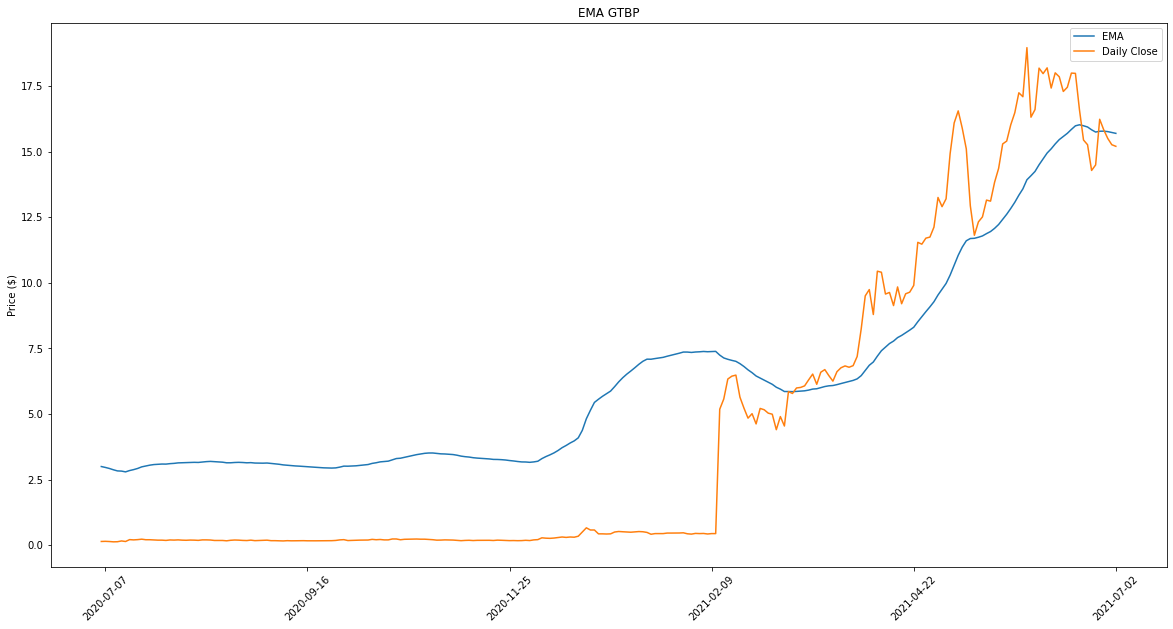

In [39]:
# Plot EMA and daily close
combined_ema_prices_plot = combined_ema_prices.plot(figsize=(20,10), ylabel='Price ($)', title=f'EMA {ticker}', rot=45)
combined_ema_prices_plot.invert_xaxis()
plt.savefig(f'plots/{ticker}_combined_ema_prices.pdf')

# MACD - Moving Average Convergence Divergence

In [40]:
# Customize the URL to create MACD request. Input time interval
interval = 'daily'

macd = f"https://www.alphavantage.co/query?function=MACD&symbol={ticker}&interval={interval}&series_type=close&apikey={apikey}"

response_data = requests.get(macd).json()
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: MACD'])

In [41]:
macd = response_data['Technical Analysis: MACD']
# Create dataframe from json type response
macd_df = pd.DataFrame(macd)
# Transform dataframe 
macd_df = macd_df.T
# Convert data from object type to float type 
macd_df = macd_df.astype('float').iloc[:252]
macd_df.tail()

,MACD_Hist,MACD,MACD_Signal
2020-07-10,-0.0816,-0.2775,-0.1959
2020-07-09,-0.0929,-0.2684,-0.1755
2020-07-08,-0.0937,-0.2460,-0.1523
2020-07-07,-0.1058,-0.2346,-0.1288
2020-07-06,-0.1263,-0.2287,-0.1024


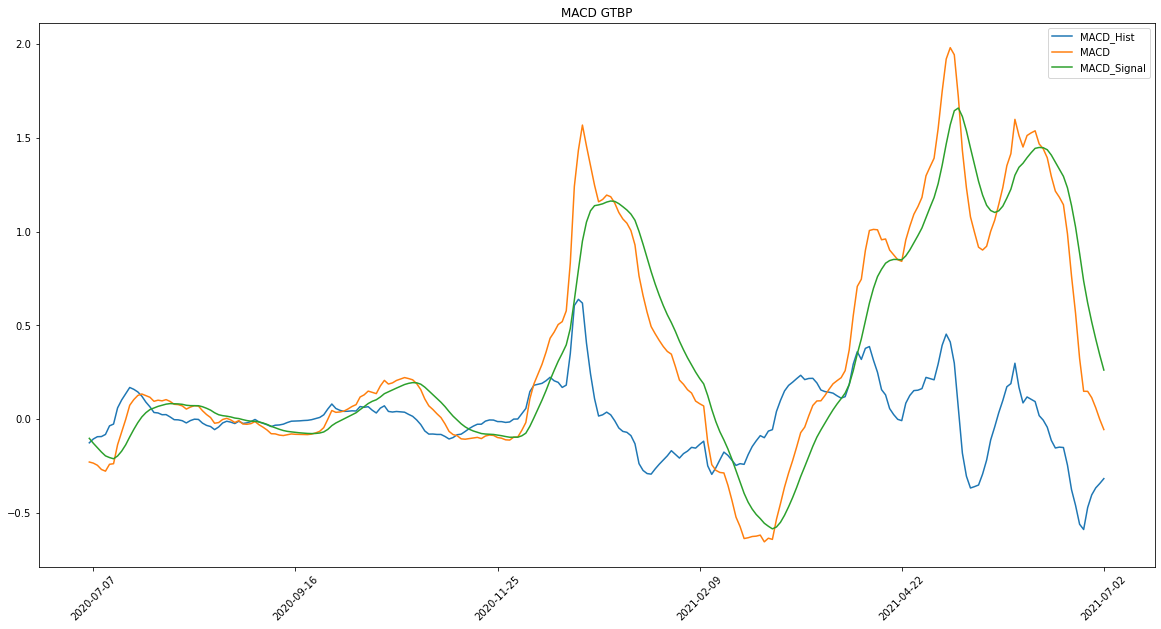

In [42]:
# Plot MACD and select number of datapoints to be plotted
macd_plot = macd_df.plot(figsize=(20,10), title=f'MACD {ticker}', rot=45)
macd_plot.invert_xaxis()
plt.savefig(f'plots/{ticker}_macd_plot.pdf')

In [43]:
# MACD crossing above zero is considered bullish, while crossing below zero is bearish. Secondly, when MACD turns up from below zero it is considered bullish. When it turns down from above zero it is considered bearish.
# Source: https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/macd

# Bollinger Bands

In [54]:
# Create url request for Bollinger Bands and select time period
interval = 'daily'
time_period = "30"

bbands = f"https://www.alphavantage.co/query?function=BBANDS&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}" 

response_data = requests.get(bbands).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: BBANDS'])

In [55]:
bbands = response_data['Technical Analysis: BBANDS']
# Create dataframe from json type response
bbands_df = pd.DataFrame(bbands)
# Tranform datatframe
bbands_df = bbands_df.T
# Convert data from object type to float type 
bbands_df = bbands_df.astype('float').iloc[:252]

In [56]:
# Add daily close price column to create a plot
combined_bbands = pd.concat([bbands_df,daily_prices_df], join='inner', axis=1)
combined_bbands.dropna(inplace=True)
combined_bbands.rename(columns={'4. close':'Daily Close'}, inplace=True)
combined_bbands

,Real Middle Band,Real Lower Band,Real Upper Band,Daily Close
2021-07-02,16.5383,13.9689,19.1078,15.200
2021-07-01,16.4927,13.7847,19.2006,15.260
2021-06-30,16.4210,13.4824,19.3596,15.500
2021-06-29,16.3427,13.1923,19.4930,15.830
2021-06-28,16.2320,12.7970,19.6670,16.230
...,...,...,...,...
2020-07-10,3.0872,2.0007,4.1737,0.130
2020-07-09,3.1325,2.0833,4.1817,0.126
2020-07-08,3.1773,2.1881,4.1665,0.138
2020-07-07,3.2096,2.2690,4.1502,0.145


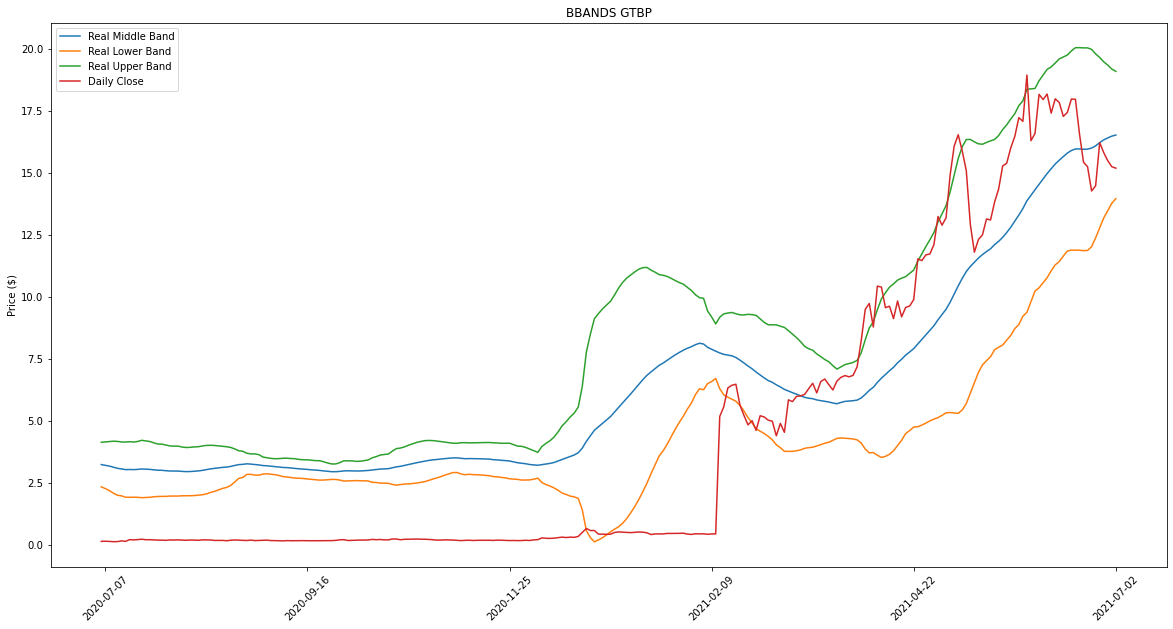

In [57]:
# Plot Bollinger Bands
combined_bbands_plot = combined_bbands.plot(figsize=(20,10), ylabel="Price ($)", title=f'BBANDS {ticker}', rot=45)
combined_bbands_plot.invert_xaxis()
plt.savefig(f'plots/{ticker}_bbands.pdf')

In [48]:
# When stock prices continually touch the upper Bollinger Band, the prices are thought to be overbought; conversely, when they continually touch the lower band, prices are thought to be oversold, triggering a buy signal.
# Source: https://www.investopedia.com/articles/technical/102201.asp 

# RSI - Relative Strength Index

In [58]:
# Customize url to obtain RSI data. Input desired interval and time period
interval = 'daily'
time_period = '30'

rsi = f"https://www.alphavantage.co/query?function=RSI&symbol={ticker}&interval={interval}&time_period={time_period}&series_type=close&apikey={apikey}"

response_data = requests.get(rsi).json() 
response_data.keys()

dict_keys(['Meta Data', 'Technical Analysis: RSI'])

In [59]:
rsi = response_data['Technical Analysis: RSI']
# Create dataframe from json type response
rsi_df = pd.DataFrame(rsi)
# Tranform datatframe
rsi_df = rsi_df.T
# Convert data from object type to float type 
rsi_df = rsi_df.astype('float').iloc[:252]
rsi_df

,RSI
2021-07-02,52.7396
2021-07-01,52.9139
2021-06-30,53.5990
2021-06-29,54.5374
2021-06-28,55.6797
...,...
2020-07-10,42.6704
2020-07-09,41.7889
2020-07-08,43.7393
2020-07-07,44.9215


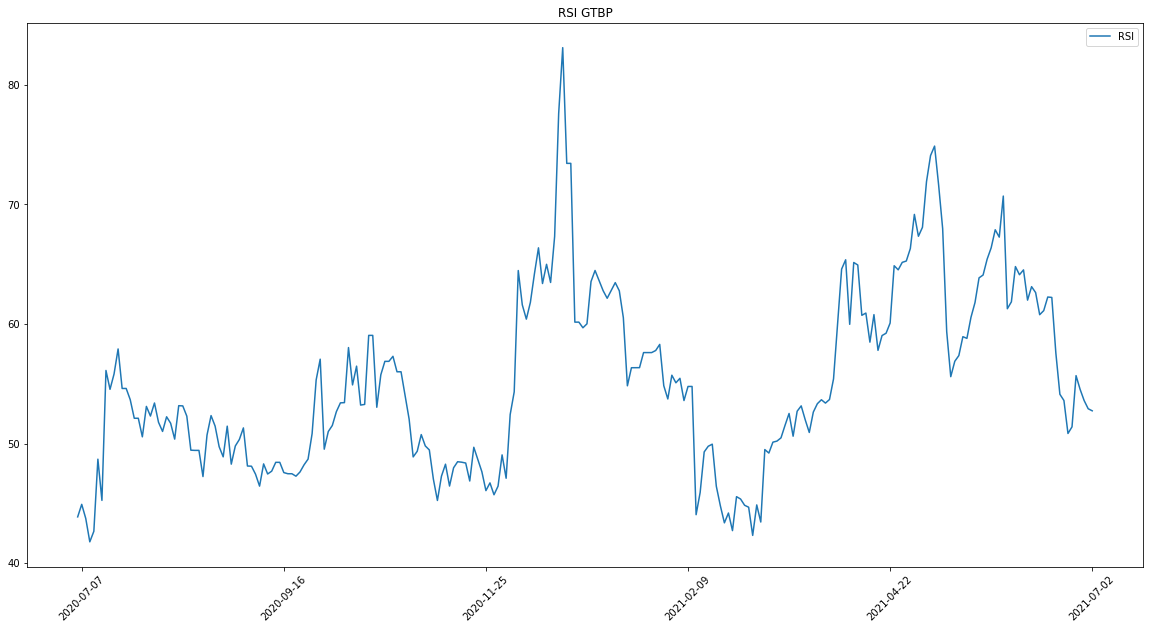

In [61]:
rsi_plot = rsi_df.plot(figsize=(20,10),title=f"RSI {ticker}", rot=45)
rsi_plot.invert_xaxis()
plt.savefig(f'plots/{ticker}_rsi.pdf')

In [510]:
# Traditional interpretation and usage of the RSI dictates that values of 70 or above suggest that a security is becoming overbought or overvalued and may be primed for a trend reversal or corrective price pullback. An RSI reading of 30 or below indicates an oversold or undervalued condition. 
# Source: https://www.investopedia.com/articles/active-trading/042114/overbought-or-oversold-use-relative-strength-index-find-out.asp